In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences , to_categorical
from keras import Sequential
from keras.layers import Dense , SimpleRNN , Embedding , Flatten , GRU , LSTM, Dropout, Bidirectional


In [3]:
train = pd.read_csv(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Sentiment Analysis using RNN\train.csv",encoding='latin1')
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
validation = pd.read_csv(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Sentiment Analysis using RNN\test.csv",encoding='latin1')
validation.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
train = train[["text","sentiment"]]
validation = validation[["text","sentiment"]]

In [6]:
train["text"].fillna(" ",inplace=True)
validation["text"].fillna(" ",inplace=True)

In [7]:
def func(sentiment):
    if sentiment=="positive":
        return 0 ;
    elif sentiment=="negative":
        return 1 ;
    else:
        return 2;
train["sentiment"]=train["sentiment"].apply(func)
validation["sentiment"]=validation["sentiment"].apply(func)

In [8]:
X_train = np.array(train["text"].tolist())
y_train = np.array(train["sentiment"].tolist())
X_test = np.array(validation["text"].tolist())
y_test = np.array(validation["sentiment"].tolist())

In [9]:
X_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [10]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [11]:
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [12]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [13]:
tokenizer = Tokenizer(num_words=20000)

In [14]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [15]:
len(tokenizer.word_index)

28614

In [16]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
X_train = pad_sequences(X_train , padding='post',maxlen=35)
X_test = pad_sequences(X_test , padding='post',maxlen=35)

In [18]:
X_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [19]:
X_train.shape

(27481, 35)

## RNN Architecture

In [20]:
model = Sequential()
model.add(Embedding(input_dim=20000,output_dim=7,input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))          

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [22]:
history = model.fit(X_train , y_train , epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4868 - loss: 0.9855 - val_accuracy: 0.7439 - val_loss: 0.7205
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7137 - loss: 0.6874 - val_accuracy: 0.7520 - val_loss: 0.6589
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7851 - loss: 0.5516 - val_accuracy: 0.7637 - val_loss: 0.5912
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8320 - loss: 0.4592 - val_accuracy: 0.7680 - val_loss: 0.6299
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8740 - loss: 0.3721 - val_accuracy: 0.7641 - val_loss: 0.5991
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8913 - loss: 0.3251 - val_accuracy: 0.7460 - val_loss: 0.6621
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9090 - loss: 0.2724 - val_accuracy: 0.7510 - val_loss: 0.7122
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9253 - loss: 0.2336 - val_accuracy: 0.

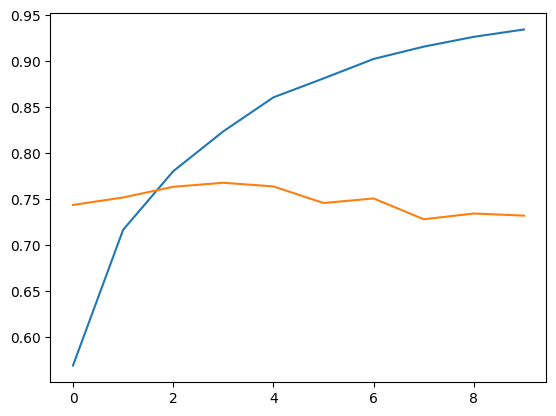

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## GRU Architecture 

In [24]:
model2 = Sequential()
model2.add(Embedding(input_dim=20000,output_dim=4,input_length=35))
model2.add(GRU(40,return_sequences=False))
model2.add(Dense(3,activation='softmax')) 

In [25]:
model2.build(input_shape=(None,35))

In [26]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 35, 4)               │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 40)                  │           5,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             123 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,643 (334.54 KB)

 Trainable params: 85,643 (334.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [28]:
history2 = model2.fit(X_train , y_train , epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4030 - loss: 1.0883 - val_accuracy: 0.5630 - val_loss: 1.0501
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4280 - loss: 1.0619 - val_accuracy: 0.7385 - val_loss: 0.7342
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7058 - loss: 0.6948 - val_accuracy: 0.7740 - val_loss: 0.5953
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7744 - loss: 0.5788 - val_accuracy: 0.7880 - val_loss: 0.5737
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8198 - loss: 0.4893 - val_accuracy: 0.7861 - val_loss: 0.5607
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8477 - loss: 0.4338 - val_accuracy: 0.7834 - val_loss: 0.5674
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8682 - loss: 0.3917 - val_accuracy: 0.7776 - val_loss: 0.5729
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8868 - loss: 0.3480 - val_accuracy: 0.

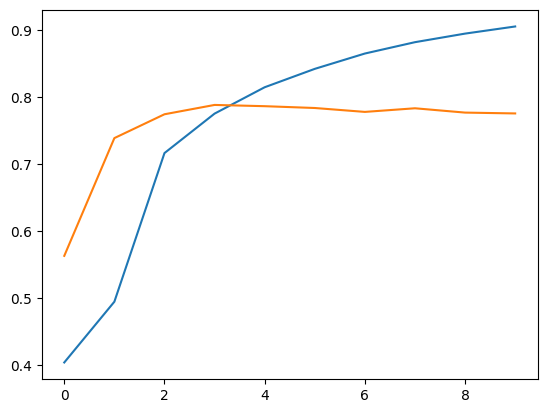

In [29]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.show()

# predictions

In [30]:
def prediction(text):
    # Prediction funtion 
    sequence = tokenizer.texts_to_sequences([text])
    padding = pad_sequences(sequence , padding='post',maxlen=35)
    pred = model2.predict(padding)
    pred_class = pred.argmax(axis=-1)
    if pred_class[0] == 0:
        print("Positive Sentiment");
    elif pred_class[0] == 1:
        print("Negative Sentiment")
    else :
        print("Natural Sentiment")

In [32]:
text = "I absolutely loved the movie I watched last night. It was so heartwarming and inspiring!"
sequence = tokenizer.texts_to_sequences([text])
padding = pad_sequences(sequence , padding='post',maxlen=35)
pred = model2.predict(padding)
pred_class = pred.argmax(axis=-1)
if pred_class[0] == 0:
    print("Positive Sentiment");
elif pred_class[0] == 1:
    print("Negative Sentiment")
else :
    print("Natural Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Positive Sentiment


In [33]:
text = "I was sad when it rained on my picnic day."
sequence = tokenizer.texts_to_sequences([text])
padding = pad_sequences(sequence , padding='post',maxlen=35)
pred = model2.predict(padding)
pred_class = pred.argmax(axis=-1)
if pred_class[0] == 0:
    print("Positive Sentiment");
elif pred_class[0] == 1:
    print("Negative Sentiment")
else :
    print("Natural Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Negative Sentiment


## positive sentence 

In [34]:
prediction("I'm so happy with how everything turned out!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Positive Sentiment


In [35]:
prediction('This product exceeded my expectations — absolutely love it!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Positive Sentiment


In [36]:
prediction('Had an amazing time at the concert last night!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Positive Sentiment


In [37]:
prediction('The customer service was excellent and super helpful.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Positive Sentiment


## Negative Sentences 

In [38]:
prediction("This is the worst experience I've ever had.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Negative Sentiment


In [39]:
prediction('Completely disappointed with the service.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Negative Sentiment


In [40]:
prediction("I can't believe how bad the quality is.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Natural Sentiment


In [41]:
prediction('Terrible — would never recommend it to anyone.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Negative Sentiment


## Natural Sentences 

In [42]:
prediction('I went to the store to buy groceries.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Natural Sentiment


In [43]:
prediction('The meeting is scheduled for 3 PM tomorrow.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Natural Sentiment


In [44]:
prediction('It rained for most of the afternoon.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Natural Sentiment


In [45]:
prediction('The report contains 15 pages of data.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Natural Sentiment


In [46]:
import joblib

## Save the model and tokenizer 

In [50]:
from tensorflow.keras.models import save_model
import pickle

# Save model
model2.save("sentiment_model.h5")

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)